In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
df = pd.read_csv("hurricane_data_after2000.csv", sep = ',')

In [3]:
## MM Comment: Need to make the ISO_TIME column a pandas time series/ datetime
df.set_index('ISO_TIME', inplace=True)

In [5]:
df.index

Index(['2000-01-01 03:00:00', '2000-01-01 06:00:00', '2000-01-01 09:00:00',
       '2000-01-01 12:00:00', '2000-01-01 15:00:00', '2000-01-01 18:00:00',
       '2000-01-01 21:00:00', '2000-01-02 00:00:00', '2000-01-02 03:00:00',
       '2000-01-02 06:00:00',
       ...
       '2023-08-15 21:00:00', '2023-08-16 00:00:00', '2023-08-16 03:00:00',
       '2023-08-16 06:00:00', '2023-08-16 09:00:00', '2023-08-16 12:00:00',
       '2023-08-16 15:00:00', '2023-08-16 18:00:00', '2023-08-16 21:00:00',
       '2023-08-17 00:00:00'],
      dtype='object', name='ISO_TIME', length=145107)

In [6]:
np.unique(df['BASIN'].astype(str))

array(['EP', 'NI', 'SA', 'SI', 'SP', 'WP', 'nan'], dtype=object)

In [7]:
np.unique(df['SUBBASIN'].astype(str))

array(['AS', 'BB', 'CP', 'CS', 'EA', 'GM', 'MM', 'WA', 'nan'],
      dtype=object)

In [8]:
np.unique(df['NATURE'].astype(str))

array(['DS', 'ET', 'MX', 'NR', 'SS', 'TS'], dtype=object)

In [9]:
df.rename({'WMO_WIND':'WIND', 'WMO_PRES':'PRES'}, axis = 'columns', inplace=True)
df

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,,
2000-01-01 03:00:00,567567,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7476,48.4301,NaN,NaN
2000-01-01 06:00:00,567568,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7333,47.9000,25.0,1000.0
2000-01-01 09:00:00,567569,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6807,47.5150,NaN,NaN
2000-01-01 12:00:00,567570,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6333,47.2000,25.0,1000.0
2000-01-01 15:00:00,567571,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6183,46.8858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16 12:00:00,712669,2023226N09270,2023,40,EP,MM,HILARY,TS,12.5333,-102.3330,NaN,NaN
2023-08-16 15:00:00,712670,2023226N09270,2023,40,EP,MM,HILARY,TS,12.8590,-102.8870,NaN,NaN
2023-08-16 18:00:00,712671,2023226N09270,2023,40,EP,MM,HILARY,TS,13.2667,-103.3330,NaN,NaN


In [76]:
df.nlargest(10, 'WIND')

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,,
2015-10-23 12:00:00,666142,2015293N13266,2015,96,EP,MM,PATRICIA,TS,17.3000,-105.6,185.0,872.0
2015-10-23 06:00:00,666140,2015293N13266,2015,96,EP,MM,PATRICIA,TS,16.5000,-105.4,180.0,886.0
2015-10-23 18:00:00,666144,2015293N13266,2015,96,EP,MM,PATRICIA,TS,18.3000,-105.3,180.0,878.0
2005-10-19 12:00:00,605764,2005289N18282,2005,97,NaN,CS,WILMA,TS,17.3000,-82.8,160.0,882.0
2019-09-01 16:40:00,689870,2019236N10314,2019,52,NaN,NaN,DORIAN,TS,26.5000,-77.0,160.0,910.0
2019-09-01 18:00:00,689871,2019236N10314,2019,52,NaN,NaN,DORIAN,TS,26.5000,-77.1,160.0,910.0
2005-09-22 03:00:00,604999,2005261N21290,2005,80,NaN,GM,RITA,TS,24.7000,-87.3,155.0,895.0
2005-09-22 06:00:00,605000,2005261N21290,2005,80,NaN,GM,RITA,TS,24.8000,-87.6,155.0,897.0
2009-10-18 06:00:00,629245,2009288N07267,2009,82,EP,MM,RICK,TS,15.1667,-106.6,155.0,906.0


In [10]:
df.groupby('SID')['WIND'].max().nlargest(10)

SID
2015293N13266    185.0
2005289N18282    160.0
2019236N10314    160.0
2005261N21290    155.0
2009288N07267    155.0
2017242N16333    155.0
2005236N23285    150.0
2007225N12331    150.0
2007244N12303    150.0
2016041S14170    150.0
Name: WIND, dtype: float64

Text(0, 0.5, 'Maximum wind speed [km/hr]')

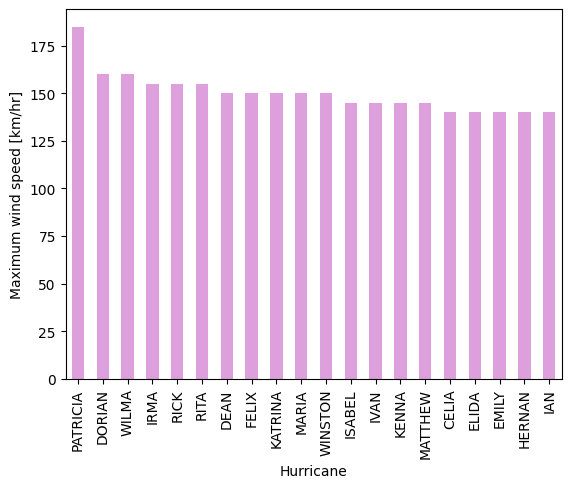

In [11]:
df.groupby('NAME')['WIND'].max().nlargest(20).plot(kind='bar', color='plum')
plt.xlabel('Hurricane')
plt.ylabel('Maximum wind speed [km/hr]')

Text(0, 0.5, 'All Counts')

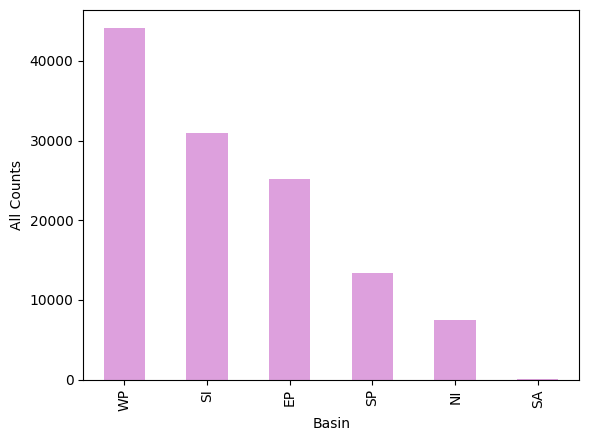

In [12]:
df['BASIN'].value_counts().plot(kind='bar', color='plum')
plt.xlabel('Basin')
plt.ylabel('All Counts')

Text(0, 0.5, 'Counts of unique hurricanes')

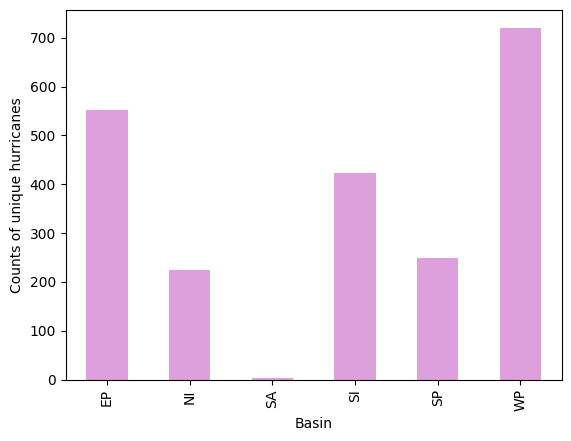

In [13]:
df.groupby('BASIN')['SID'].nunique().plot(kind='bar', color='plum')
plt.xlabel('Basin')
plt.ylabel('Counts of unique hurricanes')

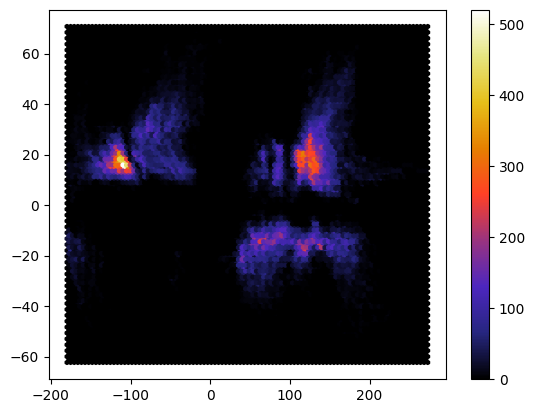

In [14]:
plt.hexbin(df['LON'], df['LAT'], cmap = 'CMRmap')
plt.colorbar()

In [15]:
df.groupby('SEASON')['SID'].nunique()

SEASON
2000    110
2001    102
2002    102
2003    108
2004    103
2005    120
2006     97
2007     91
2008    104
2009    100
2010     88
2011     96
2012     92
2013    103
2014     93
2015    109
2016     99
2017    108
2018    113
2019    113
2020    117
2021    114
2022     99
2023     46
Name: SID, dtype: int64

In [16]:
df['DATE'] = pd.to_datetime(df.index)
df.set_index('DATE', inplace=True)

In [17]:
df

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
DATE,,,,,,,,,,,,
2000-01-01 03:00:00,567567,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7476,48.4301,NaN,NaN
2000-01-01 06:00:00,567568,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7333,47.9000,25.0,1000.0
2000-01-01 09:00:00,567569,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6807,47.5150,NaN,NaN
2000-01-01 12:00:00,567570,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6333,47.2000,25.0,1000.0
2000-01-01 15:00:00,567571,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6183,46.8858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16 12:00:00,712669,2023226N09270,2023,40,EP,MM,HILARY,TS,12.5333,-102.3330,NaN,NaN
2023-08-16 15:00:00,712670,2023226N09270,2023,40,EP,MM,HILARY,TS,12.8590,-102.8870,NaN,NaN
2023-08-16 18:00:00,712671,2023226N09270,2023,40,EP,MM,HILARY,TS,13.2667,-103.3330,NaN,NaN


Text(0, 0.5, 'Count of data points')

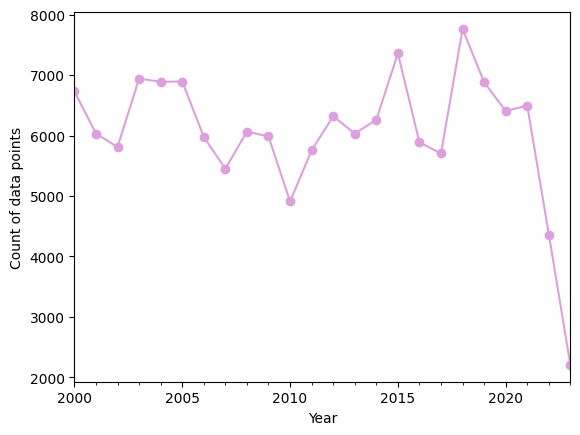

In [18]:
df.resample('Y').size().plot(kind='line', marker='o', color='plum')
plt.xlabel('Year')
plt.ylabel('Count of data points')

In [19]:
df['DATE'] = pd.to_datetime(df.index)
#df['DOY'] = df['DATE'].dt.dayofyear
df['DOY'] = df.index.dayofyear

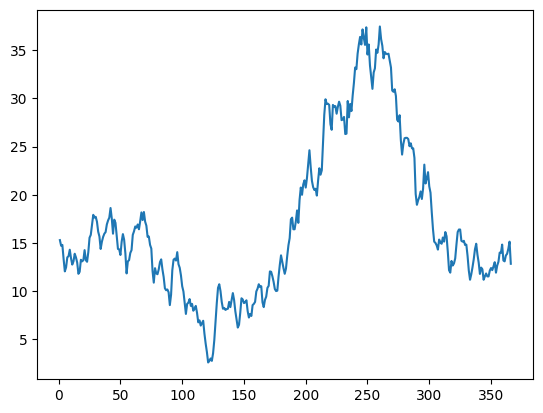

In [21]:
df.groupby('DOY').size().resample('D').mean()

## MM Comment: You need to resample by day first, then groupby the day of the year
df_month = df.resample('D').count()
df_month = df_month.groupby(by=[df_month.index.dayofyear]).mean()

plt.plot(df_month.index, df_month['NUMBER'])